## Importing Data, Feature Selection, and Cleaning

In [61]:
# For this ipynb we will be running ML algorithms to see what the associations are between variables recorded for wildfires,
# using wildfire data from 1992 to 2015. Added to the data set retrieved from !<website for fire data here>! is weather data
# from !<website weather here>! to include average, min, max and precipitation data.

# Start by importing dependencies and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [62]:
# import the dataset for testing
dataset_file = "resources/CA_GA_filtered_fires.csv"
df = pd.read_csv(dataset_file)
df.head()

,OBJECTID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,MONTH,YEAR_MONTH,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Join_code,Month_Precipitation,Month_avg_temp,month_max_temp,month_min_temp
0,1182886,Chattahoochee-Oconee National Forest,ROCK CLIMBING FIRE,2010,2010-12-08T00:00:00.000Z,12,201012,Arson,2010-12-08T00:00:00.000Z,0.25,A,34.646389,-83.963611,GA,187,GA201012,2.27,39.9,51.5,28.3
1,1201922,GAS Oconee District,NaN,2010,2010-12-14T00:00:00.000Z,12,201012,Debris Burning,NaN,1.00,B,33.002479,-83.066761,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
2,1201923,GAS Oconee District,NaN,2010,2010-12-16T00:00:00.000Z,12,201012,Miscellaneous,NaN,2.06,B,33.012973,-83.345341,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
3,1201924,GAS Oconee District,NaN,2010,2010-12-23T00:00:00.000Z,12,201012,Debris Burning,NaN,7.20,B,33.048480,-83.371733,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
4,1201925,GAS Oconee District,NaN,2010,2010-12-31T00:00:00.000Z,12,201012,Children,NaN,5.00,B,32.982684,-83.181268,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3


In [63]:
# Create a new df with selected values for each given test
# Need to create dataframes for each given category we want to test

# fire cause
df_fire_cause = df[["FIRE_SIZE", "STATE", "YEAR_MONTH", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
#df_fire_cause.head()

# fire class size df
df_fire_class_size = df[["FIRE_SIZE_CLASS", "STATE", "YEAR_MONTH", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
df_fire_class_size.head()

,FIRE_SIZE_CLASS,STATE,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR
0,A,GA,201012,39.9,51.5,28.3,Arson
1,B,GA,201012,39.9,51.5,28.3,Debris Burning
2,B,GA,201012,39.9,51.5,28.3,Miscellaneous
3,B,GA,201012,39.9,51.5,28.3,Debris Burning
4,B,GA,201012,39.9,51.5,28.3,Children


In [77]:
# Drop null values
df_fire_cause = df_fire_cause.dropna()
df_fire_class_size = df_fire_class_size.dropna()
df_fire_cause = df_fire_cause[df_fire_cause['STAT_CAUSE_DESCR'] != 'Missing/Undefined']
df_fire_class_size = df_fire_class_size[df_fire_class_size['STAT_CAUSE_DESCR'] != 'Missing/Undefined']
print(df_fire_class_size.describe())
print("------")
print(df_fire_cause.describe())


          YEAR_MONTH  Month_avg_temp  month_max_temp  month_min_temp
count  231483.000000   231483.000000   231483.000000   231483.000000
mean   200393.849622       66.286181       79.906949       52.653454
std       651.756338       10.341108       11.379830        9.441630
min    199201.000000       39.900000       49.300000       28.300000
25%    199809.000000       58.500000       71.100000       45.600000
50%    200510.000000       69.500000       84.300000       55.400000
75%    200907.000000       74.700000       89.000000       60.000000
max    201501.000000       83.200000       94.700000       72.600000
------
           FIRE_SIZE     YEAR_MONTH  Month_avg_temp  month_max_temp  \
count  231483.000000  231483.000000   231483.000000   231483.000000   
mean       52.832328  200393.849622       66.286181       79.906949   
std      1909.806174     651.756338       10.341108       11.379830   
min         0.001000  199201.000000       39.900000       49.300000   
25%         0.100

In [1]:
# # Create a new df with selected values for each given test
# # Need to create dataframes for each given category we want to test

# # fire cause
# df_fire_cause = df_clean[["FIRE_SIZE", "STATE", "YEAR_MONTH", "Month_avg_temp", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
# #df_fire_cause.head()

# # fire class size df
# df_fire_class_size = df_clean[["FIRE_SIZE_CLASS", "STATE", "YEAR_MONTH", "Month_avg_temp", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
# df_fire_class_size.head()

#### Changed order of operations to see if we get more usable data. Reason: Goes from 300k+ 
#### datapoints down to 46k datapoints if dropna() is used before subsetting the 2 datasets

In [78]:
# # Some columns are not numbers, we will need to dummy a few columns
# # "dbe" will stand for "Data_binary_encoded" as we replace specific categories of text with numbers to stand in for the text

# # make a copy of the two datasets (df_fire_class_size and df_fire_cause) so as to not change the underlying dfs 
# # Fire cause data is "dataset_1"
# dataset_1 = df_fire_cause.copy()

# # Fire class data is "dataset_2"
# dataset_2 = df_fire_class_size.copy()

# dbe_cause = pd.get_dummies(dataset_1, columns=["STATE", "STAT_CAUSE_DESCR"])
# dbe_class = pd.get_dummies(dataset_2, columns=["FIRE_SIZE_CLASS", "STATE", "STAT_CAUSE_DESCR"])
# dbe_class.columns

# ignore above ^^^

# fire cause
X = df_fire_cause.drop("STAT_CAUSE_DESCR", axis=1)
y = df_fire_cause["STAT_CAUSE_DESCR"]
X.columns

Index(['FIRE_SIZE', 'STATE', 'YEAR_MONTH', 'Month_avg_temp', 'month_max_temp',
       'month_min_temp'],
      dtype='object')

## Splitting Data

In [79]:
# Label encoder will change our "y" variable from text to numbers to that DL will work on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [80]:
X = pd.get_dummies(X, columns=["STATE"])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)



## Scaling Data

In [82]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\ProgramData\Anaconda3\envs\Pythondata\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [83]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

## Determining Proportions of the Training and Test Data

In [84]:
#print('All:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Training:', np.bincount(encoded_y_train) / float(len(encoded_y_train)) * 100.0)
print('Test:', np.bincount(encoded_y_test) / float(len(encoded_y_test)) * 100.0)

Training: [12.04813031  4.81303136  4.02506739 19.45430039 19.25385342  0.09043154
 12.53023985 23.53351151  0.51321337  0.61631684  3.06948828  0.05241573]
Test: [12.04748492  4.81242764  4.02446821 19.45361234 19.25489451  0.08985502
 12.52959168 23.53510394  0.51321042  0.61688929  3.06889461  0.05356742]


In [85]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(y_train_categorical)
print(y_test_categorical)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Attempting to Plot a scatter matrix, currently failing

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0                  Arson
1         Debris Burning
2          Miscellaneous
3         Debris Burning
4               Children
5               Children
6         Debris Burning
7                  Arson
8         Debris Burning
9               Campfire
10        Debris Burning
11        Debris Burning
12         Miscellaneous
13        Debris Burning
14        Debris Burning
15        Debris Burning
16        Debris Burning
17         Miscellaneous
18         Miscellaneous
19        Debris Burning
20        Debris Burning
21        Debris Burning
22         Miscellaneous
23        Debris Burning
24        Debris Burning
25              Campfire
26        Debris Burning
27         Miscellaneous
28               Smoking
29        Debris Burning
               ...      
344756     Miscellaneous
344757    Debris Burning
344758          Campfire
344759    Debris Burning
344760    Debris Burning
344761             Arson
344762             Arson
344763     Miscellaneous
344764     Miscellaneous
344765     Miscellaneous
344766     Miscellaneous
344767    Debris Burning
344768     Equipment Use
344769             Arson
344770     Equipment Use
344771     Equipment Use
344772     Equipment Use
344773    Debris Burning
344774    Debris Burning
344775     Equipment Use
344776          Campfire
344777    Debris Burning
344778     Equipment Use
344779           Smoking
344780    Debris Burning
344781     Miscellaneous
344782             Arson
344783     Equipment Use
344784          Campfire
344785     Equipment Use
Name: STAT_CAUSE_DESCR, Length: 231483, dtype: object.

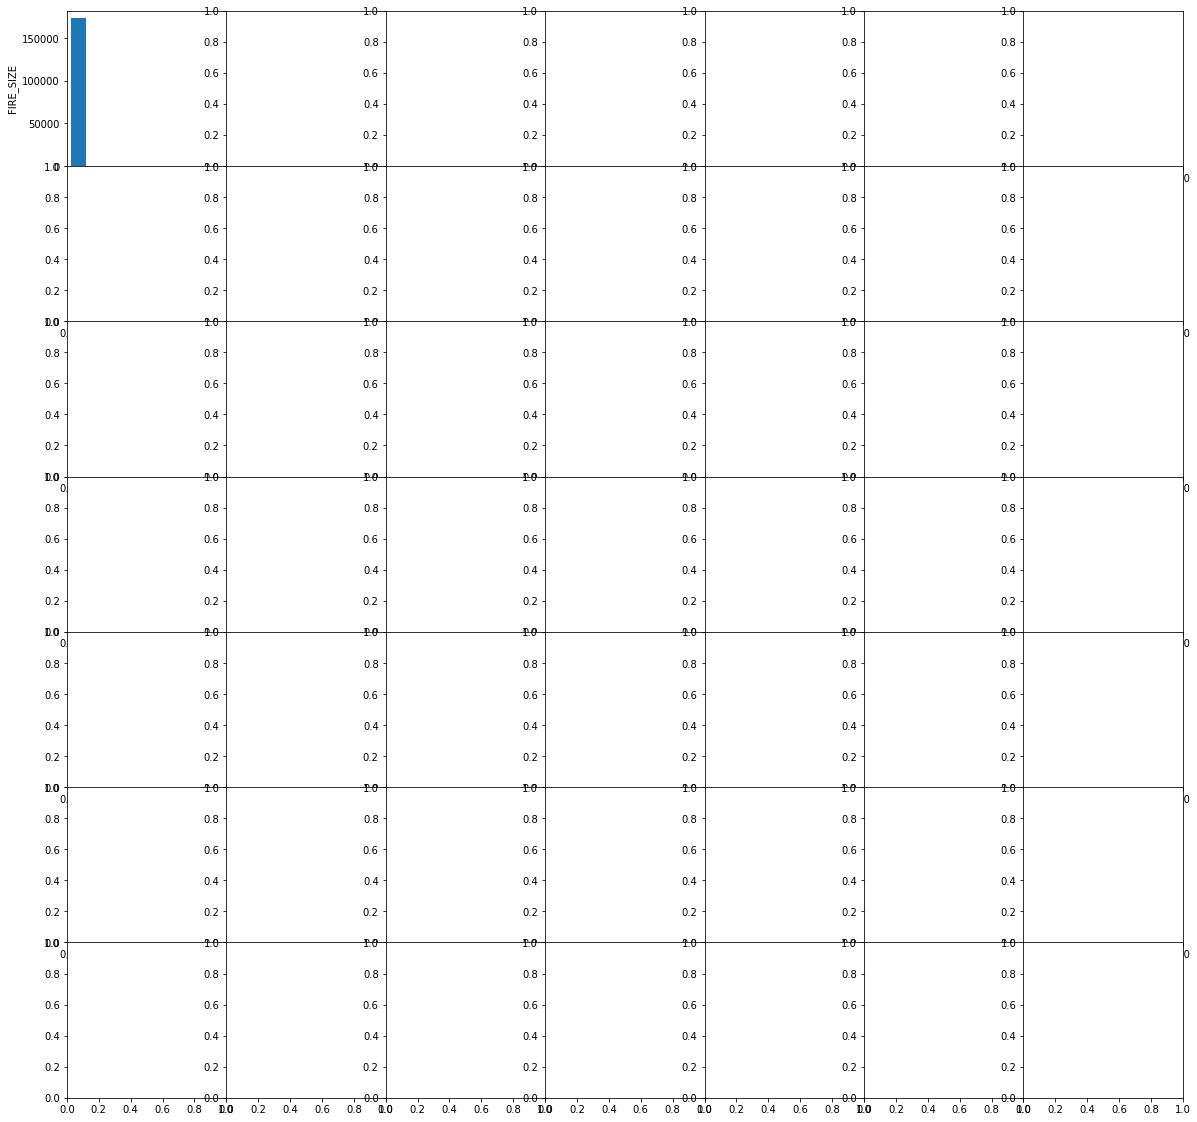

In [88]:
    
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(X_train, c=y, figsize=(20, 20));

In [58]:
pd.plotting.scatter_matrix??

## Deep Learning for Predicting Fire Cause Category based on Fire size and weather averages

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

In [96]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_20 (Dense)             (None, 12)                1212      
Total params: 3,472
Trainable params: 3,472
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
173612/173612 - 10s - loss: 1.7509 - acc: 0.3532
Epoch 2/60
173612/173612 - 10s - loss: 1.7344 - acc: 0.3553
Epoch 3/60
173612/173612 - 9s - loss: 1.7300 - acc: 0.3545
Epoch 4/60
173612/173612 - 10s - loss: 1.7273 - acc: 0.3554
Epoch 5/60
173612/173612 - 10s - loss: 1.7251 - acc: 0.3565
Epoch 6/60
173612/173612 - 10s - loss: 1.7221 - acc: 0.3573
Epoch 7/60
173612/173612 - 9s - loss: 1.7204 - acc: 0.3581
Epoch 8/60
173612/173612 - 9s - loss: 1.7189 - acc: 0.3587
Epoch 9/60
173612/173612 - 9s - loss: 1.7179 - acc: 0.3582
Epoch 10/60
173612/173612 - 9s - loss: 1.7166 - acc: 0.3589
Epoch 11/60
173612/173612 - 9s - loss: 1.7158 - acc: 0.3611
Epoch 12/60
173612/173612 - 9s - loss: 1.7150 - acc: 0.3606
Epoch 13/60
173612/173612 - 9s - loss: 1.7144 - acc: 0.3604
Epoch 14/60
173612/173612 - 10s - loss: 1.7133 - acc: 0.3619
Epoch 15/60
173612/173612 - 9s - loss: 1.7126 - acc: 0.3634
Epoch 16/60
173612/173612 - 9s - loss: 1.7124 - acc: 0.3622
Epoch 17/60
173612/173612 - 9s - loss: 1.71

In [27]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

60607/60607 - 2s - loss: 1.7322 - acc: 0.3622
Normal Neural Network - Loss: 1.7321916595196014, Accuracy: 0.36216938495635986


In [28]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [29]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Debris Burning' 'Debris Burning' 'Lightning' 'Debris Burning'
 'Miscellaneous']
Actual Labels: ['Arson', 'Debris Burning', 'Children', 'Children', 'Equipment Use']


## Second Deep Learning Model to Predict Fire Category by Fire Cause and Weather Data Averages

In [38]:
# New Categorical assessment to try to find the Fire Size Category, from A to G:
# Class A - one-fourth acre or less;
# Class B - more than one-fourth acre, but less than 10 acres;
# Class C - 10 acres or more, but less than 100 acres;
# Class D - 100 acres or more, but less than 300 acres;
# Class E - 300 acres or more, but less than 1,000 acres;
# Class F - 1,000 acres or more, but less than 5,000 acres;
# Class G - 5,000 acres or more

# new X and y variables 
X = df_fire_class_size.drop("FIRE_SIZE_CLASS", axis=1)
y = df_fire_class_size["FIRE_SIZE_CLASS"]
X.head()


,STATE,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR
0,GA,201012,39.9,51.5,28.3,Arson
1,GA,201012,39.9,51.5,28.3,Debris Burning
2,GA,201012,39.9,51.5,28.3,Miscellaneous
3,GA,201012,39.9,51.5,28.3,Debris Burning
4,GA,201012,39.9,51.5,28.3,Children


In [39]:
X = pd.get_dummies(X, columns=["STATE"])

X.head()

,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR,STATE_CA,STATE_GA
0,201012,39.9,51.5,28.3,Arson,0,1
1,201012,39.9,51.5,28.3,Debris Burning,0,1
2,201012,39.9,51.5,28.3,Miscellaneous,0,1
3,201012,39.9,51.5,28.3,Debris Burning,0,1
4,201012,39.9,51.5,28.3,Children,0,1


In [61]:
 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ["STAT_CAUSE_DESCR"])], remainder='passthrough')
# X = np.array(columnTransformer.fit_transform(X), dtype = np.str)

#### Referenced https://blog.contactsunny.com/data-science/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning
#### Didn't work for what i needed, missing steps

In [41]:
labelencoder = LabelEncoder()
X["STAT_CAUSE_DESCR"] = labelencoder.fit_transform(X["STAT_CAUSE_DESCR"])
#X["STATE"] = labelencoder.fit_transform(X["STATE"])
X.head()

# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [6])
# X = onehotencoder.fit_transform(X).toarray()

,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR,STATE_CA,STATE_GA
0,201012,39.9,51.5,28.3,0,0,1
1,201012,39.9,51.5,28.3,3,0,1
2,201012,39.9,51.5,28.3,7,0,1
3,201012,39.9,51.5,28.3,3,0,1
4,201012,39.9,51.5,28.3,2,0,1


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [43]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\ProgramData\Anaconda3\envs\Pythondata\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [45]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [46]:
print('Training:', np.bincount(encoded_y_train) / float(len(encoded_y_train)) * 100.0)
print('Test:', np.bincount(encoded_y_test) / float(len(encoded_y_test)) * 100.0)

Training: [45.86099363 46.15909228  6.05547275  0.96084568  0.49994775  0.30964861
  0.15399931]
Test: [45.86103915 46.15803455  6.05540614  0.96028512  0.49994225  0.31019519
  0.1550976 ]


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [52]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 707       
Total params: 11,607
Trainable params: 11,607
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
181819/181819 - 13s - loss: 0.9617 - acc: 0.5364
Epoch 2/100
181819/181819 - 13s - loss: 0.9563 - acc: 0.5386
Epoch 3/100
181819/181819 - 13s - loss: 0.9523 - acc: 0.5479
Epoch 4/100
181819/181819 - 13s - loss: 0.9427 - acc: 0.5601
Epoch 5/100
181819/181819 - 13s - loss: 0.9364 - acc: 0.5658
Epoch 6/100
181819/181819 - 14s - loss: 0.9339 - acc: 0.5664
Epoch 7/100
181819/181819 - 14s - loss: 0.9331 - acc: 0.5669
Epoch 8/100
181819/181819 - 13s - loss: 0.9322 - acc: 0.5673
Epoch 9/100
181819/181819 - 13s - loss: 0.9316 - acc: 0.5680
Epoch 10/100
181819/181819 - 13s - loss: 0.9308 - acc: 0.5690
Epoch 11/100
181819/181819 - 13s - loss: 0.9305 - acc: 0.5693
Epoch 12/100
181819/181819 - 13s - loss: 0.9302 - acc: 0.5699
Epoch 13/100
181819/181819 - 13s - loss: 0.9303 - acc: 0.5695
Epoch 14/100
181819/181819 - 13s - loss: 0.9300 - acc: 0.5697
Epoch 15/100
181819/181819 - 13s - loss: 0.9297 - acc: 0.5702
Epoch 16/100
181819/181819 - 13s - loss: 0.9296 - acc: 0.5712
Epoch 17/100
1818

In [55]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

60607/60607 - 2s - loss: 0.9280 - acc: 0.5747
Normal Neural Network - Loss: 0.9279916856010669, Accuracy: 0.5747026205062866


In [56]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [57]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['A' 'B' 'B' 'B' 'A']
Actual Labels: ['B', 'B', 'A', 'B', 'B']
